<a href="https://colab.research.google.com/github/codholic/multiclass_-classification_Chinese_zodiac_animals/blob/master/Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Upload zip file signs.zip to 'My Drive' 
2. Mount your drive using code below. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 3. Unzip the file:



In [9]:
!unzip signs.zip

Archive:  signs.zip
replace signs/valid/pig/00000563.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: signs/valid/pig/00000563.jpg  
  inflating: signs/valid/pig/00000205.jpg  
  inflating: signs/valid/pig/00000211.jpg  
  inflating: signs/valid/pig/00000577.jpg  
  inflating: signs/valid/pig/00000588.jpg  
  inflating: signs/valid/pig/00000742.jpeg  
  inflating: signs/valid/pig/00000589.jpg  
  inflating: signs/valid/pig/00000210.jpg  
  inflating: signs/valid/pig/00000576.jpg  
  inflating: signs/valid/pig/00000562.jpg  
  inflating: signs/valid/pig/00000238.jpg  
  inflating: signs/valid/pig/00000200.jpeg  
  inflating: signs/valid/pig/00000650.jpeg  
  inflating: signs/valid/pig/00000012.jpg  
  inflating: signs/valid/pig/00000760.jpg  
  inflating: signs/valid/pig/00000199.jpg  
  inflating: signs/valid/pig/00000600.jpg  
  inflating: signs/valid/pig/00000166.jpg  
  inflating: signs/valid/pig/00000172.jpg  
  inflating: signs/valid/pig/00000614.jpg  
  inflating: signs/

You just unziped your folder. Take a look at the structure, and pictures

In [0]:
import os
os.chdir("/content/drive/My Drive/")

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np


Define transforms, rezise, rotate slightly, preform horizontal flip

In [0]:
data_dir = 'signs'

batch_size = 20


#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

val_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

#  Preparing datasets
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
val_data = datasets.ImageFolder(data_dir + '/valid', transform=val_transforms)

 
#Dataloader 
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
valloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

#specifying image classes
Class=[' Rat', 'Ox', 'Tiger', 'Rabbit', 'Dragon', 'Snake', 'Horse', 'Goat', 'Monkey', 'Rooster', 'Dog', 'Pig']

#Defining the CNN Architecture

________________________________

#Visualizing a batch of traing data



In [0]:
def imshow(img):
  img=img /2 + 0.5
  plt.imshow(np.transpose(img,(1,2,0)))


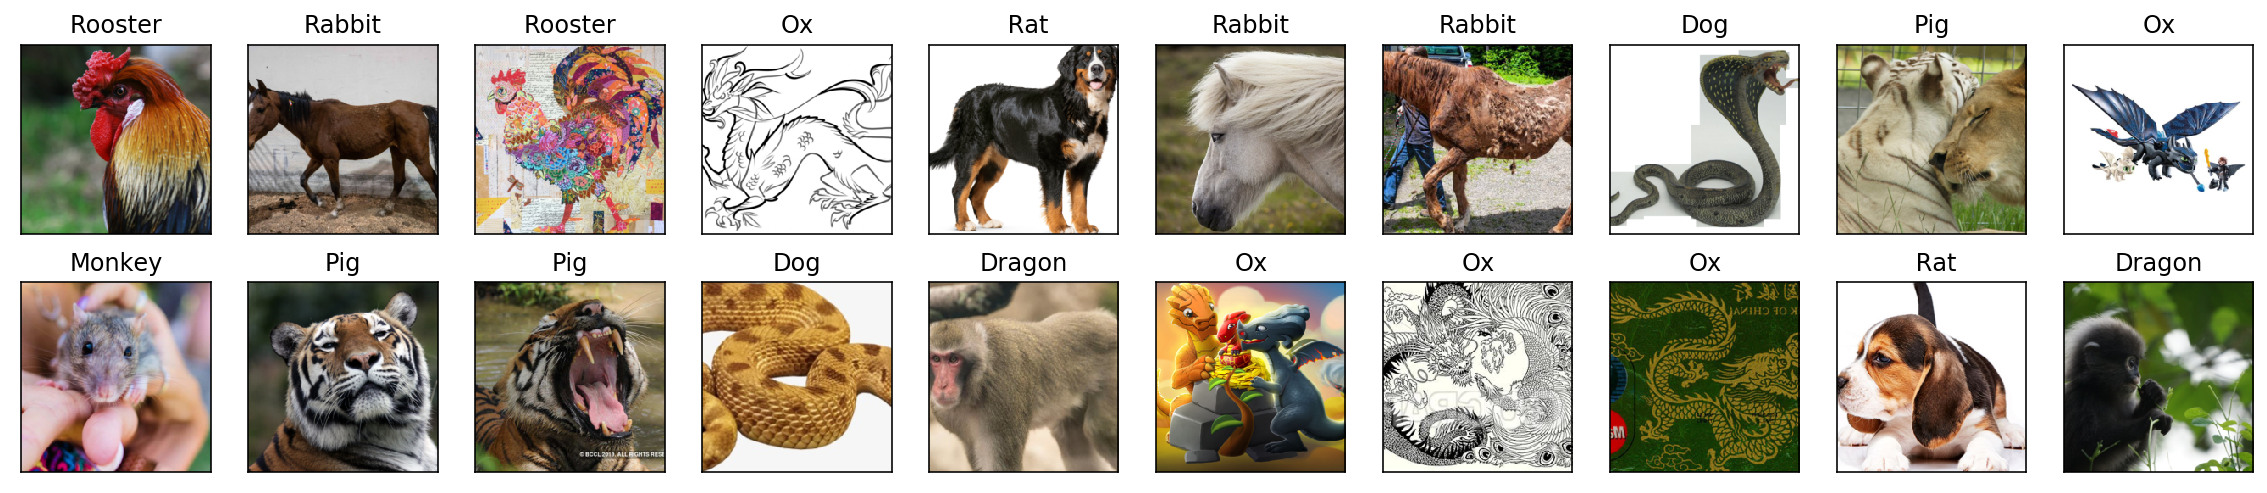

In [28]:
#obtain one batch of train image
dataiter=iter(trainloader)
images,labels=dataiter.next()
images=images.numpy() #converting images to numpy for display

#plotting images
fig=plt.figure(figsize=(20,4))
for ii in range(20):
  ax=fig.add_subplot(2,20/2,ii+1,xticks=[],yticks=[])
  imshow(images[ii])
  ax.set_title(Class[labels[ii]])